In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense


# Load dataset (top 10k words)
num_words = 10000
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=num_words)

# Pad sequences to 500 tokens
maxlen = 500
train_data = pad_sequences(train_data, maxlen=maxlen)
test_data = pad_sequences(test_data, maxlen=maxlen)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [5]:
# Build model
model = Sequential()
model.add(Embedding(input_dim=num_words, output_dim=32, input_length=maxlen))
model.add(tf.keras.layers.Dropout(0.2))  # Add dropout after embedding
model.add(LSTM(32, recurrent_dropout=0.2))  # Add recurrent dropout to LSTM
model.add(tf.keras.layers.Dropout(0.2))  # Add dropout before final dense layer
model.add(Dense(1, activation='sigmoid'))

# Compile
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=2,
    restore_best_weights=True
)

# Train
history = model.fit(
    train_data, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2,
    callbacks=[early_stopping]  # Add early stopping
)

# Evaluate
test_loss, test_acc = model.evaluate(test_data, test_labels)
print(f'Test accuracy: {test_acc:.4f}')

Epoch 1/10


C:\Users\zamza\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


157/157 ━━━━━━━━━━━━━━━━━━━━ 49s 289ms/step - accuracy: 0.6334 - loss: 0.6457 - val_accuracy: 0.8366 - val_loss: 0.3827
Epoch 2/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 44s 283ms/step - accuracy: 0.8373 - loss: 0.3921 - val_accuracy: 0.8036 - val_loss: 0.4312
Epoch 3/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 44s 279ms/step - accuracy: 0.8608 - loss: 0.3387 - val_accuracy: 0.8482 - val_loss: 0.3677
Epoch 4/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 44s 280ms/step - accuracy: 0.8925 - loss: 0.2808 - val_accuracy: 0.8232 - val_loss: 0.3981
Epoch 5/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 45s 289ms/step - accuracy: 0.8991 - loss: 0.2597 - val_accuracy: 0.8330 - val_loss: 0.3969
782/782 ━━━━━━━━━━━━━━━━━━━━ 22s 29ms/step - accuracy: 0.8400 - loss: 0.3746
Test accuracy: 0.8411


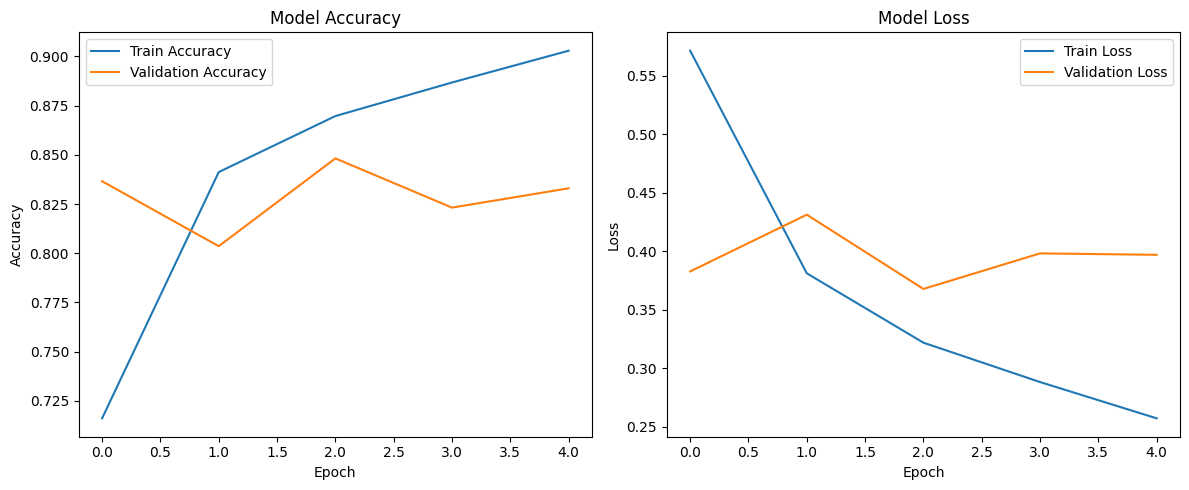

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

# Plot training & validation accuracy
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

plt.tight_layout()
plt.show()